# Project

# 1. Perform Expploratory Data analysis

In [1]:
# Load the data

import pandas as pd

data = pd.read_csv("cancer.csv")

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [2]:
# Summary Statistics

data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<AxesSubplot:>

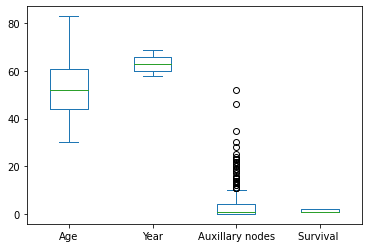

In [13]:
# Box plot

%matplotlib inline

data.plot.box()

<AxesSubplot:>

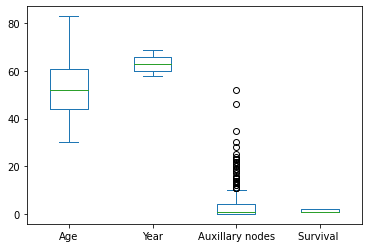

In [9]:
# Removing Outliers

# Max = 75% + 1.5* (75% - 25%)
maximum = 50 + 1.5*(50 - 0)

new_data = data[data["Auxillary nodes"] <= maximum]

new_data.plot.box()


In [10]:
# Correlation

corr = new_data.corr()

corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Auxillary nodes,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


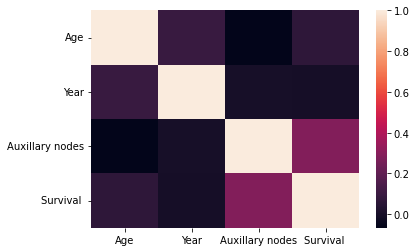

In [12]:
# Visualization - Correlation

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)

plt.show()

In [14]:
# Remove correlated variables

final_data = new_data.drop(columns = ["Year"])

final_data

,Age,Auxillary nodes,Survival
0,30,3,1
1,30,0,1
2,31,2,1
3,31,4,1
4,33,10,1
...,...,...,...
300,75,1,1
301,76,0,1
302,77,3,1
303,78,1,2


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Auxillary nodes'}>],
       [<AxesSubplot:title={'center':'Survival '}>, <AxesSubplot:>]],
      dtype=object)

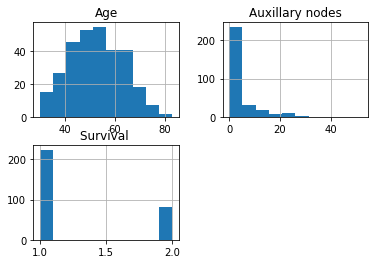

In [15]:
# Skewness

final_data.hist()

In [20]:
# Standardization and Normalization - Scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(final_data)
scaled = scaler.fit_transform(final_data)
scaled_data = pd.DataFrame(scaled, columns = final_data.columns)

scaled_data

,Age,Auxillary nodes,Survival
0,0.000000,0.057692,0.0
1,0.000000,0.000000,0.0
2,0.018868,0.038462,0.0
3,0.018868,0.076923,0.0
4,0.056604,0.192308,0.0
...,...,...,...
300,0.849057,0.019231,0.0
301,0.867925,0.000000,0.0
302,0.886792,0.057692,0.0
303,0.905660,0.019231,1.0
